In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('street_easy.csv')
df.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


# Análisis Univariable

Como su nombre indica se centran en una única variable. El tipo de método de visualización va a depender del tipo de variable (cuantitativa o categórica).

## Variables cuantitativas

Los diagramas de caja (también llamados diagramas de violín) y los histogramas son adecuados para resumir visualamente una variable cuantitativa. Son útiles porque informan sobre los valores máximos, mínimos, los valores centrales y la dispersión. Además, los histogramas pueden proporcionar información sobre patrones como el sesgo o la multimodalidad.


Si se representa mediante un diagrama de cajas el precio del alquiler se obtiene el siguiente resultado.

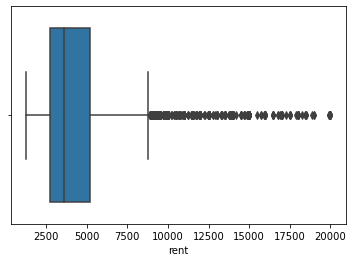

In [4]:
sns.boxplot(x='rent', data=df)
plt.show()

Como se aprecia los precios sulen oscilar entre los 2500 y los 5000 \$. Sin embargo, se detectan muchos * outliers *. Especialmente en la zona alta. Para describir con más detalle los precios podemos usar un histograma.

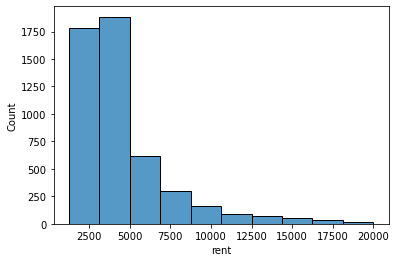

In [5]:
# crear un histograma de la variable 'rent'
sns.histplot(df.rent, bins=10, kde=False) # bins indica el número de intervalos. No se computa el kernel de densidades estimado (kde)
plt.show()

Se aprecia claramente la cola hacia la derecha entre los precios de alquiler.
Para apreciarlo mejor se puede aumentar el número de intervalos considerados.


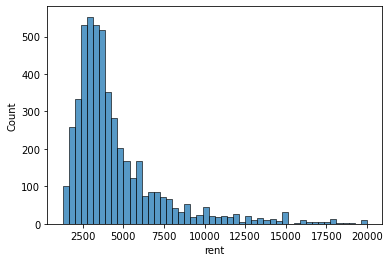

In [6]:
sns.histplot(df.rent, bins=50, kde  =False) 
plt.show()

## Variables categóricas
En lugar de un histograma se usa un diagrama de barras.

Supongamos que queramos contar los elementos por vecindario.

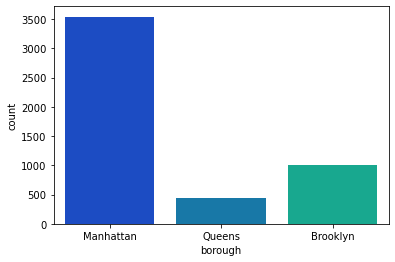

In [7]:
sns.countplot(x='borough', data=df, palette='winter') # el parámetro 'palette' especifica el esquema de colores.
plt.show()

# Ánalisis multivariante

Sometimes, a data analyst is interested in simultaneously exploring the relationship between three or more variables in a single visualization. Many of the visualization methods presented up to this point can include additional variables by using visual cues such as colors, shapes, and patterns. For example, we can investigate the relationship between rental price, square footage, and borough by using color to introduce our third variable:

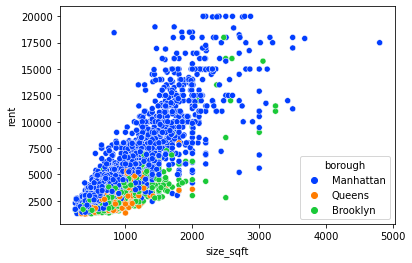

In [9]:
sns.scatterplot(x=df.size_sqft, y=df.rent, hue = df.borough, palette='bright')
plt.show()

Another common data visualization for multivariate analysis is a heat map of a correlation matrix for all quantitative variables:

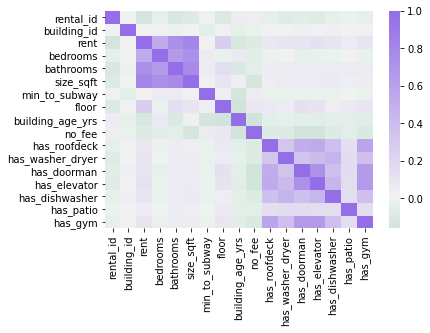

In [10]:
# Define the colormap which maps the data values to the color space defined with the diverging_palette method  
colors = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)
 
# Create heatmap using the .corr method on df, set colormap to cmap
sns.heatmap(df.corr(), center=0, cmap=colors, robust=True)
plt.show()